# Which injuries have been reported by households?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
df = pd.read_stata('raw_data/dta/MTF_NG_HH_SEC_G_LAMP_CANDLE.dta')

In [6]:
df.to_csv('injury.csv')

In [7]:
df.head(10)

,HH_ID,F2,Fuel_roster_name,F3,F3_oth,F_4,F_4oth,F_5,F_6,F_7,...,F_13oth,F_14__1,F_14__2,F_14__3,F_14__4,F_14__5,F_14__6,F_14__7,F_14__8,F_14__111
0,1.000506e+12,Candle,,No,,NaN,,NaN,NaN,NaN,...,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.000506e+12,Open wick lamp,,No,,NaN,,NaN,NaN,NaN,...,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.000506e+12,Hurricane lamp with glass cover,,No,,NaN,,NaN,NaN,NaN,...,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.000506e+12,Pressurized mantle lamp,,No,,NaN,,NaN,NaN,NaN,...,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.000506e+12,"Other, specify",,No,,NaN,,NaN,NaN,NaN,...,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1.000506e+12,Candle,,No,,NaN,,NaN,NaN,NaN,...,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1.000506e+12,Open wick lamp,,No,,NaN,,NaN,NaN,NaN,...,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1.000506e+12,Hurricane lamp with glass cover,,No,,NaN,,NaN,NaN,NaN,...,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1.000506e+12,Pressurized mantle lamp,,No,,NaN,,NaN,NaN,NaN,...,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1.000506e+12,"Other, specify",,No,,NaN,,NaN,NaN,NaN,...,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18345 entries, 0 to 18344
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   HH_ID             18345 non-null  float64 
 1   F2                18345 non-null  category
 2   Fuel_roster_name  18345 non-null  object  
 3   F3                18316 non-null  category
 4   F3_oth            18345 non-null  object  
 5   F_4               135 non-null    category
 6   F_4oth            18345 non-null  object  
 7   F_5               135 non-null    float64 
 8   F_6               135 non-null    float64 
 9   F_7               204 non-null    float64 
 10  F_8               204 non-null    float64 
 11  F_9               204 non-null    float64 
 12  F_10              69 non-null     float64 
 13  F_4_text          18345 non-null  object  
 14  F_11              135 non-null    float64 
 15  F_12              204 non-null    float64 
 16  F_13_1            204 

In [9]:
df.shape

(18345, 27)

In [10]:
df["F_14__3"].isna().sum()

18141

In [11]:
injury_cols=df[df.columns[18:26]]

In [12]:
injury_cols

,F_14__1,F_14__2,F_14__3,F_14__4,F_14__5,F_14__6,F_14__7,F_14__8
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
18340,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18341,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18342,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18343,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
injury_cols=injury_cols.dropna()
injury_cols

,F_14__1,F_14__2,F_14__3,F_14__4,F_14__5,F_14__6,F_14__7,F_14__8
1160,0.0,No,0.0,No,No,0.0,No,No
1983,0.0,No,0.0,No,No,0.0,No,No
2332,0.0,No,0.0,No,No,0.0,No,No
2532,0.0,No,0.0,No,No,0.0,Yes,No
2592,0.0,No,0.0,No,No,0.0,No,No
...,...,...,...,...,...,...,...,...
17470,0.0,No,0.0,No,No,0.0,No,No
17477,0.0,No,0.0,No,No,0.0,No,No
17622,0.0,No,0.0,No,No,0.0,No,No
17797,0.0,No,0.0,No,No,0.0,No,No


In [11]:
injury_counts=injury_cols.apply(pd.Series.value_counts)
injury_counts

,F_14__1,F_14__2,F_14__3,F_14__4,F_14__5,F_14__6,F_14__7,F_14__8
0.0,204.0,NaN,204.0,NaN,NaN,204.0,NaN,NaN
No,NaN,197.0,NaN,201.0,202.0,NaN,198.0,202.0
Yes,NaN,7.0,NaN,3.0,2.0,NaN,6.0,2.0


Death or permanent limb 
damage……………………...1
Burns/fire…………………...2
Poisoning……………………3
Eye problems………………..4
Respiratory problem………..5
Other major injury………….6
Minor injury………………..7
Fire with no injury…………8
None………………………11

In [12]:
injury_counts.rename(columns={"F_14__1": "damage"}, inplace=True)


In [13]:
injury_counts.rename(columns={"F_14__2": "Burns/fire"}, inplace=True)

In [14]:
injury_counts.rename(columns={"F_14__3": "Poisoning"}, inplace=True)

In [15]:
injury_counts.rename(columns={"F_14__4": "Eye problems"}, inplace=True)

In [16]:
injury_counts.rename(columns={"F_14__5": "Respiratory problem"}, inplace=True)


In [17]:
injury_counts.rename(columns={"F_14__6": "Other major injury"}, inplace=True)

In [18]:
injury_counts.rename(columns={"F_14__7": "Minor injury"}, inplace=True)

In [19]:
injury_counts.rename(columns={"F_14__8": "Fire with no injury"}, inplace=True)

In [27]:
injury_yes=injury_counts.iloc[2]

In [28]:
injury_yes

damage                 NaN
Burns/fire             7.0
Poisoning              NaN
Eye problems           3.0
Respiratory problem    2.0
Other major injury     NaN
Minor injury           6.0
Fire with no injury    2.0
Name: Yes, dtype: float64

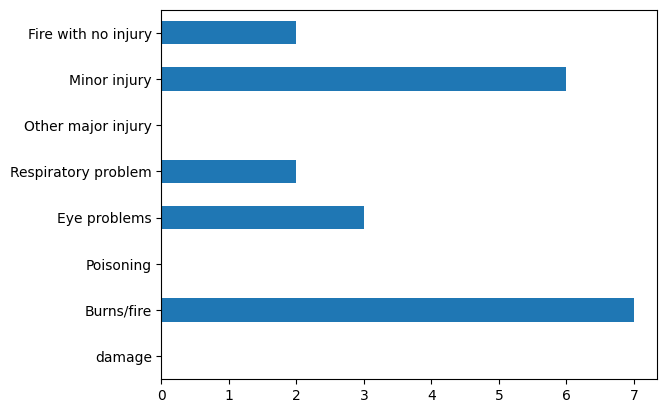

In [29]:
#plt.figure(figsize=(10,4))
injury_yes.plot(kind="barh")
plt.show()

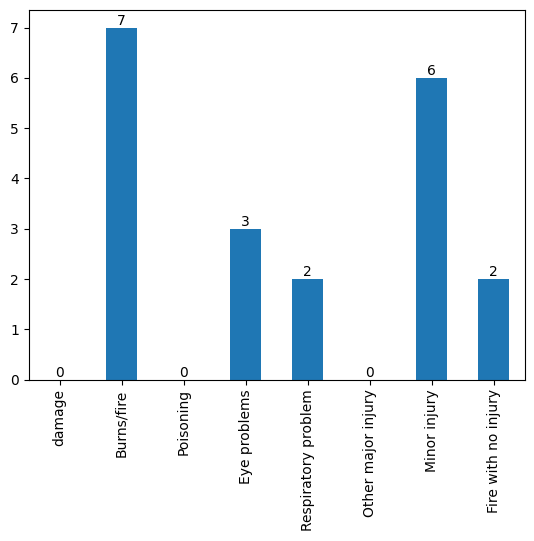

In [30]:
ax = injury_yes.plot.bar()

for container in ax.containers:
    ax.bar_label(container)

### Conclusion:

Burns/Fire and minor injuries are highest injuries found

In [15]:
df_C = pd.read_stata('raw_data/dta/MTF_NG_HH_SEC_C.dta')

In [17]:
df_C['C41'].value_counts()

No     1686
Yes      14
Name: C41, dtype: int64